In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
#importing all the necessary packages
#tensorflow 2.0
from tensorflow.keras import datasets, layers, models

In [0]:
data = pd.read_csv('drive/My Drive/DATA files/Face Emotion detection/fer2013.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
print(data.emotion.unique()) #there are totally seven emotions

[0 2 4 6 3 5 1]


In [0]:
# getting pixels data from the Dataframe
def extract_from_pixelrow(pixels):
    pixels = pixels.split(' ')
    pixels = np.array([int(i) for i in pixels])
    return np.reshape(pixels, (48, 48))    

def extract_image(pixels):
    pixels = pixels.as_matrix()[0] # The output is a string
    return extract_from_pixelrow(pixels)


In [0]:
def overview(total_rows, data):
    fig = plt.figure(figsize=(10,10))
    idx = 0
    for i, row in data.iterrows():
        input_img = extract_from_pixelrow(row.pixels)
        ax = fig.add_subplot(5,5,idx+1)
        ax.imshow(input_img, cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
        idx += 1
    plt.show()

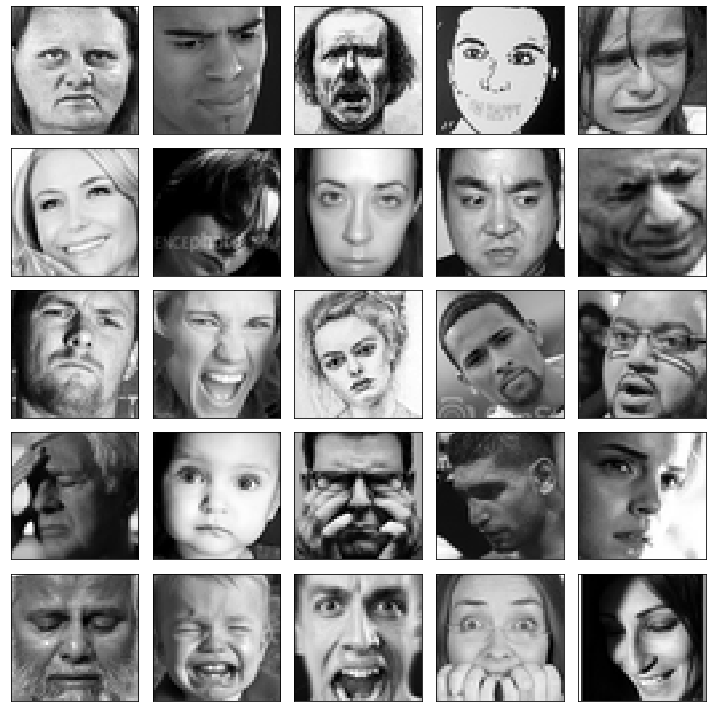

In [0]:
num_images = 25
data = data.sample(n=num_images)
overview(num_images, data) # overview of face data as thumbnails (private)


In [0]:
emotion_description = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

In [0]:

with open("drive/My Drive/DATA files/Face Emotion detection/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))



number of instances:  35888
instance length:  2304


In [0]:
#initialize trainset and test set
train_images, train_labels, test_images, test_labels = [], [], [], []

#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = tf.keras.utils.to_categorical(emotion, num_classes=7)
    
        if 'Training' in usage:
            train_labels.append(emotion)
            train_images.append(pixels)
        elif 'PublicTest' or 'PrivateTest' in usage:
            test_labels.append(emotion)
            test_images.append(pixels)
    except:
      print("",end="")

#data transformation for train and test sets
train_images = np.array(train_images, 'float32')
train_labels = np.array(train_labels, 'float32')
test_images = np.array(test_images, 'float32')
test_labels = np.array(test_labels, 'float32')

train_images /= 255 #normalize inputs between [0, 1]
test_images /= 255

train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
train_images = train_images.astype('float32')
test_images = test_images.reshape(test_images.shape[0], 48, 48, 1)
test_images = test_images.astype('float32')

print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
%time

28709 train samples
7178 test samples
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [0]:
train_images.shape

(28709, 48, 48, 1)

In [0]:
test_images.shape

(7178, 48, 48, 1)

In [0]:
train_labels.shape

(28709, 7)

In [0]:
test_labels.shape

(7178, 7)

In [0]:
model = models.Sequential()

#1st layer

model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

#2nd layer

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

#3rd layer

model.add(layers.Conv2D(512, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

#4th layer

model.add(layers.Conv2D(1024, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [0]:
model.add(layers.Flatten())

#fully connected 1st layer

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

#fully connected 2nd layer

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

#fully connected 3rd layer

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(7, activation='softmax'))

In [0]:
from tensorflow.keras.optimizers import Adam

opt=Adam(lr=0.0001)

model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Image data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
checkpoint = ModelCheckpoint("drive/My Drive/DATA files/Face Emotion detection/model1_weights_emotion.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)

# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch=300, epochs=100,validation_data=(test_images, test_labels),callbacks=callbacks_list)

Epoch 1/100
299/300 [============================>.] - ETA: 0s - loss: 2.2433 - accuracy: 0.2094
Epoch 00001: val_accuracy improved from -inf to 0.24714, saving model to drive/My Drive/DATA files/Face Emotion detection/model1_weights_emotion.h5
300/300 [==============================] - 78s 261ms/step - loss: 2.2423 - accuracy: 0.2095 - val_loss: 1.9306 - val_accuracy: 0.2471
Epoch 2/100
299/300 [============================>.] - ETA: 0s - loss: 2.0402 - accuracy: 0.2466
Epoch 00002: val_accuracy improved from 0.24714 to 0.25286, saving model to drive/My Drive/DATA files/Face Emotion detection/model1_weights_emotion.h5
300/300 [==============================] - 77s 255ms/step - loss: 2.0398 - accuracy: 0.2467 - val_loss: 1.8883 - val_accuracy: 0.2529
Epoch 3/100
299/300 [============================>.] - ETA: 0s - loss: 1.9056 - accuracy: 0.2801
Epoch 00003: val_accuracy improved from 0.25286 to 0.34982, saving model to drive/My Drive/DATA files/Face Emotion detection/model1_weights_em

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('model_final_weights_emotion.h5')
model_file = drive.CreateFile({'CNN_model' : 'model_final_weights_emotion.h5'})
model_file.SetContentFile('model_final_weights_emotion.h5')                      
model_file.Upload()

7178/1 - 4s - loss: 1.2810 - accuracy: 0.6769


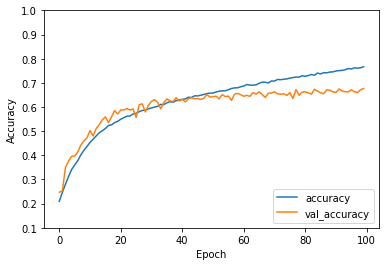

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
load_model = tf.keras.models.load_model('drive/My Drive/model_final_weights_emotion.h5')

In [0]:
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 128)      

In [0]:
y_prob = load_model.predict(test_images)
y_pred = np.argmax(y_prob)
y_actual = np.argmax(test_labels)

**Testing liera**

In [0]:
image_test= tf.keras.preprocessing.image.load_img('drive/My Drive/RDJ_happy.png', grayscale=False,
    color_mode='rgb')

In [0]:
img_test3 = tf.keras.preprocessing.image.load_img('drive/My Drive/RDJ_happy.png',
    color_mode='grayscale',
    target_size=(48,48))
img1 = np.array(img_test3)
img1.shape
img1 = img1 / 255.0
img1 = img1.reshape(1, 48, 48, 1)

In [0]:
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise','neutral']

In [0]:
result1 = np.argmax(load_model.predict(img1))
print(labels[result1])

happy


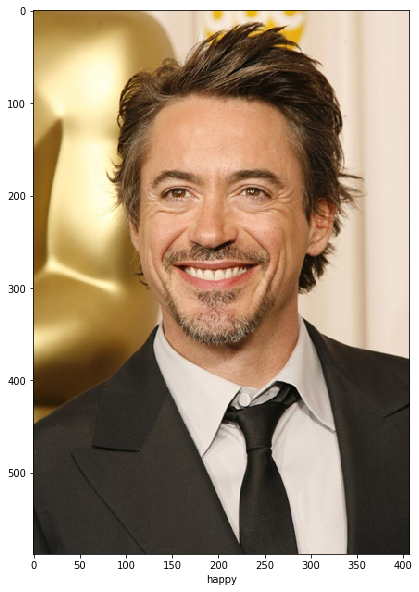

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(image_test)
plt.xlabel(labels[result1])
plt.show()

happy


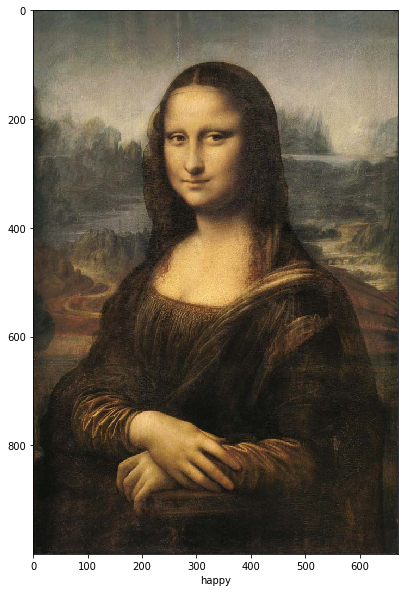

In [0]:
image_test1= tf.keras.preprocessing.image.load_img('drive/My Drive/Mona-Lisa.jpg', grayscale=False,
    color_mode='rgb')
img_test4 = tf.keras.preprocessing.image.load_img('drive/My Drive/Mona-Lisa.jpg',
    color_mode='grayscale',
    target_size=(48,48))
img2 = np.array(img_test3)
img2.shape
img2 = img2 / 255.0
img2 = img2.reshape(1, 48, 48, 1)
result2 = np.argmax(load_model.predict(img2))
print(labels[result2])
plt.figure(figsize=(10,10))
plt.imshow(image_test1)
plt.xlabel(labels[result2])
plt.show()

sad


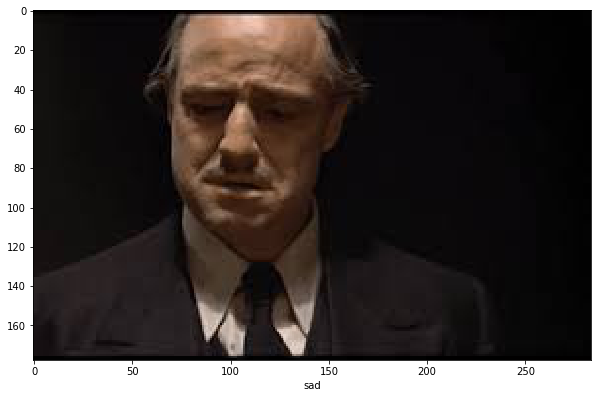

In [0]:
image_test2= tf.keras.preprocessing.image.load_img('drive/My Drive/test1.jpg', grayscale=False,
    color_mode='rgb')
img_test5 = tf.keras.preprocessing.image.load_img('drive/My Drive/test1.jpg',
    color_mode='grayscale',
    target_size=(48,48))
img3 = np.array(img_test5)
img3.shape
img3 = img3 / 255.0
img3 = img3.reshape(1, 48, 48, 1)
result3 = np.argmax(load_model.predict(img3))
print(labels[result3])
plt.figure(figsize=(10,10))
plt.imshow(image_test2)
plt.xlabel(labels[result3])
plt.show()

In [0]:
"""emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

model_rt = load_model

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if ret is True:
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
      break
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        prediction = model_rt.predict(cropped_img)
        cv2.putText(frame, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()"""